## Question 1

### Introduction:
Special thanks to: [https://github.com/justmarkham](https://github.com/justmarkham) for sharing the dataset and materials.

### Occupations

**Step 1.** Import the necessary libraries  
**Step 2.** Import the dataset from this address.  
**Step 3.** Assign it to a variable called `users`  
**Step 4.** Discover what is the mean age per occupation  
**Step 5.** Discover the Male ratio per occupation and sort it from the most to the least  
**Step 6.** For each occupation, calculate the minimum and maximum ages  
**Step 7.** For each combination of occupation and sex, calculate the mean age  
**Step 8.** For each occupation present the percentage of women and men  omen and men

In [42]:
import pandas as pd

dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(dataset_url, sep='|')

print("Dataset Overview:\n", users.head())

average_age_per_occupation = users.groupby('occupation')['age'].mean().round(2)
print("\nAverage Age by Occupation:\n", average_age_per_occupation)

users['is_male'] = users['gender'].map({'M': 1, 'F': 0})

male_ratio_by_occupation = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False).round(2)
print("\nMale Ratio by Occupation (Descending):\n", male_ratio_by_occupation)

age_range_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nAge Range by Occupation:\n", age_range_by_occupation)

mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean().round(2)
print("\nMean Age by Occupation and Gender:\n", mean_age_by_occupation_gender)

gender_distribution = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

gender_percentage = (gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100).round(2)
print("\nGender Percentage by Occupation:\n", gender_percentage)


Dataset Overview:
    user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Average Age by Occupation:
 occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64

Male Ratio by Occupation (Descending):
 occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
execut

## Question 2

### Euro Teams

**Step 1.** Import the necessary libraries  
**Step 2.** Import the dataset from this address  
**Step 3.** Assign it to a variable called `euro12`  
**Step 4.** Select only the Goal column  
**Step 5.** How many teams participated in the Euro2012?  
**Step 6.** What is the number of columns in the dataset?  
**Step 7.** View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called `discipline`  
**Step 8.** Sort the teams by Red Cards, then by Yellow Cards  
**Step 9.** Calculate the mean Yellow Cards given per Team  
**Step 10.** Filter teams that scored more than 6 goals  
**Step 11.** Select the teams that start with G  
**Step 12.** Select the first 7 columns  
**Step 13.** Select all columns except the last 3  
**Step 14.** Present only the Shooting Accuracy from England, Italy, and Russia  taly and Russia

In [47]:
import pandas as pd

dataset_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(dataset_url)

print("Dataset Preview:\n", euro12.head())

goals = euro12['Goals']
print("\nGoals Column:\n", goals)

num_teams = euro12['Team'].nunique()
print("\nNumber of Teams Participated:", num_teams)

num_columns = euro12.shape[1]
print("\nNumber of Columns in the Dataset:", num_columns)

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline DataFrame:\n", discipline.head())

sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print("\nTeams Sorted by Red and Yellow Cards:\n", sorted_discipline)

average_yellow_cards = discipline['Yellow Cards'].mean()
print("\nAverage Yellow Cards per Team:", round(average_yellow_cards, 2))

teams_with_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nTeams that Scored More than 6 Goals:\n", teams_with_more_than_6_goals[['Team', 'Goals']])

teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams Starting with 'G':\n", teams_starting_with_g[['Team']])

first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 Columns:\n", first_7_columns.head())

all_except_last_3 = euro12.iloc[:, :-3]
print("\nAll Columns Except the Last 3:\n", all_except_last_3.head())

shooting_accuracy_selected = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy of England, Italy, and Russia:\n", shooting_accuracy_selected)


Dataset Preview:
              Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not sco

## Question 3

### Housing

**Step 1.** Import the necessary libraries  
**Step 2.** Create 3 different Series, each of length 100, as follows:  
- The first a random number from 1 to 4  
- The second a random number from 1 to 3  
- The third a random number from 10,000 to 30,000  

**Step 3.** Create a DataFrame by joining the Series by column  
**Step 4.** Change the name of the columns to `bedrs`, `bathrs`, `price_sqr_meter`  
**Step 5.** Create a one column DataFrame with the values of the 3 Series and assign it to `bigcolumn`  
**Step 6.** Ops it seems it is going only until index 99. Is it true?  
**Step 7.** Reindex the DataFrame so it goes from 0 to 299  rom 0 to 299

In [49]:
import pandas as pd
import numpy as np

Series_A = pd.Series(np.random.randint(1, 5, size=100))
Series_B = pd.Series(np.random.randint(1, 4, size=100))
Series_C = pd.Series(np.random.randint(10000, 30001, size=100))

housing_data = pd.concat([Series_A, Series_B, Series_C], axis=1)
housing_data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("Housing DataFrame:\n", housing_data.head())

bigcolumn = pd.concat([Series_A, Series_B, Series_C], axis=0).reset_index(drop=True).to_frame(name='bigcolumn')
print("\nBigcolumn DataFrame (First 10 rows):\n", bigcolumn.head(10))

print("\nLength of 'bigcolumn' index:", bigcolumn.index.max())
print("Does the index go only up to 99?", bigcolumn.index.max() == 99)

bigcolumn_reindexed = bigcolumn.reindex(range(300))
print("\nBigcolumn after reindexing (Last 10 rows):\n", bigcolumn_reindexed.tail(10))


Housing DataFrame:
    bedrs  bathrs  price_sqr_meter
0      1       2            14105
1      1       3            12458
2      3       2            10870
3      2       3            19886
4      1       3            23583

Bigcolumn DataFrame (First 10 rows):
    bigcolumn
0          1
1          1
2          3
3          2
4          1
5          2
6          1
7          4
8          2
9          1

Length of 'bigcolumn' index: 299
Does the index go only up to 99? False

Bigcolumn after reindexing (Last 10 rows):
      bigcolumn
290      19655
291      17490
292      11062
293      19994
294      21015
295      13152
296      20005
297      10693
298      18779
299      11392


# Question 4: Wind Statistics
 
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct.
 
The data in `wind.data` has the following format:
 
| Yr  | Mo | Dy | RPT   | VAL   | ROS   | KIL   | SHA   | BIR   | DUB   | CLA   | MUL   | CLO   | BEL   | MAL   |
|-----|----|----|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 61  | 1  | 1  | 15.04 | 14.96 | 13.17 | 9.29  | NaN   | 9.87  | 13.67 | 10.25 | 10.83 | 12.58 | 18.50 | 15.04 |
| 61  | 1  | 2  | 14.71 | NaN   | 10.83 | 6.50  | 12.62 | 7.67  | 11.50 | 10.04 | 9.79  | 9.67  | 17.54 | 13.83 |
| 61  | 1  | 3  | 18.50 | 16.88 | 12.33 | 10.13 | 11.17 | 6.17  | 11.25 | NaN   | 8.50  | 7.67  | 12.75 | 12.71 |
 
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
 
### Steps:
 
1. **Import the necessary libraries**:
   Import the necessary libraries to handle the dataset.
 
2. **Import the dataset from the attached file `wind.txt`**:
   Import the dataset from the `wind.txt` file, which contains the wind statistics.
 
3. **Assign it to a variable called `data` and replace the first 3 columns by a proper datetime index**:
   Assign the dataset to a variable `data` and modify the first three columns to create a datetime index.
 
4. **Year 2061? Do we really have data from this year? Create a function to fix it and apply it**:
   There seems to be an error with the year 2061. You need to create a function to correct this issue and apply it to the dataset.
 
5. **Set the right dates as the index. Pay attention at the data type, it should be `datetime64[ns]`**:
   Ensure that the datetime index is in the proper data type `datetime64[ns]`.
 
6. **Compute how many values are missing for each location over the entire record**:
   Find how many missing values exist for each location over the entire dataset. Ensure missing values are ignored in calculations.
 
7. **Compute how many non-missing values there are in total**:
   Calculate how many non-missing values exist in the dataset.
 
8. **Calculate the mean windspeeds over all the locations and all the times. A single number for the entire dataset**:
   Calculate the average windspeed across all locations and times, providing a single value.
 
9. **Create a DataFrame called `loc_stats` and calculate the min, max, mean windspeeds, and standard deviations of the windspeeds at each location over all the days**:
   Create a new DataFrame called `loc_stats` containing the minimum, maximum, mean, and standard deviation of the windspeeds at each location.
 
10. **Create a DataFrame called `day_stats` and calculate the min, max, mean windspeed, and standard deviations of the windspeeds across all the locations at each day**:
   Create a new DataFrame called `day_stats` containing the minimum, maximum, mean, and standard deviation of windspeeds across all locations for each day.
 
11. **Find the average windspeed in January for each location**:
   Treat January 1961 and January 1962 both as January. Calculate the average windspeed for each location in January.
 
12. **Downsample the record to a yearly frequency for each location**:
   Downsample the dataset to a yearly frequency for each location.
 
13. **Downsample the record to a monthly frequency for each location**:
   Downsample the dataset to a monthly frequency for each location.
 
14. **Downsample the record to a weekly frequency for each location**:
   Downsample the dataset to a weekly frequency for each location.
 
15. **Calculate the min, max, and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2, 1961) for the first 52 weeks**:
   Calculate the weekly minimum, maximum, mean, and standard deviations for the windspeeds across all locations for the first 52 weeks of data.2 1961) for the first 52 weeks.12.75 12.71

In [21]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\thisi\Downloads\ps3\ps3\wind.txt'
data = pd.read_csv(file_path, sep=r'\s+')

data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
data.set_index('Date', inplace=True)

def correct_year(date):
    return date.replace(year=date.year - 100) if date.year > 2000 else date

data.index = data.index.map(correct_year)

assert data.index.dtype == 'datetime64[ns]'

missing_values = data.isnull().sum()

non_missing_total = data.notnull().sum().sum()

overall_mean_windspeed = data.mean().mean()

loc_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]

day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)

january_data = data[data.index.month == 1]
january_avg_windspeed = january_data.groupby(january_data.index.month).mean()

yearly_data = data.resample('YE').mean()

monthly_data = data.resample('ME').mean()

weekly_data = data.resample('W').mean()

weekly_stats = weekly_data.aggregate(['min', 'max', 'mean', 'std']).iloc[:52]

print("\nMissing Values by Location:")
print(missing_values)

print("\nTotal Non-Missing Values:")
print(non_missing_total)

print("\nOverall Mean Windspeed:")
print(overall_mean_windspeed)

print("\nLocation Statistics:")
print(loc_stats)

print("\nDaily Statistics:")
print(day_stats)

print("\nJanuary Average Windspeed:")
print(january_avg_windspeed)

print("\nYearly Data:")
print(yearly_data)

print("\nMonthly Data:")
print(monthly_data)

print("\nWeekly Data:")
print(weekly_data)

print("\nWeekly Statistics for First 52 Weeks:")
print(weekly_stats)



Missing Values by Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total Non-Missing Values:
78857

Overall Mean Windspeed:
10.227982360836938

Location Statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Daily Statistics:
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1

# Question 5
## Chipotle Orders Analysis

### Steps to Follow:
1. **Import the necessary libraries**
2. **Import the dataset from this address.**
3. **Assign it to a variable called `chipo`.**
4. **See the first 10 entries.**
5. **What is the number of observations in the dataset?**
6. **What is the number of columns in the dataset?**
7. **Print the name of all the columns.**
8. **How is the dataset indexed?**
9. **Which was the most-ordered item?**
10. **For the most-ordered item, how many items were ordered?**
11. **What was the most ordered item in the `choice_description` column?**
12. **How many items were ordered in total?**
13. **Turn the item price into a float**
    - **Check the item price type**
    - **Create a lambda function and change the type of item price**
    - **Check the item price type**
14. **How much was the revenue for the period in the dataset?**
15. **How many orders were made in the period?**
16. **What is the average revenue amount per order?**
17. **How many different items are sold?**erent items are sold?

In [3]:
# Step 1: Import the pandas library to handle data manipulation and analysis.

import pandas as pd


file_path = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')  # Reading the dataset


print("\nFirst 10 entries of the dataset:")
print(chipo.head(10))


num_observations = chipo.shape[0]
print(f"\nNumber of observations in the dataset: {num_observations}")


num_columns = chipo.shape[1]
print(f"\nNumber of columns in the dataset: {num_columns}")


print("\nColumn names:")
print(chipo.columns)


index_info = chipo.index
print(f"\nDataset index: {index_info}")


most_ordered_item = chipo['item_name'].mode()[0]  # Finding the most frequent item
print(f"\nMost ordered item: {most_ordered_item}")


most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()  # Total quantity of the most ordered item
print(f"\nTotal number of '{most_ordered_item}' ordered: {most_ordered_item_count}")


most_ordered_choice_desc = chipo['choice_description'].mode()[0]  # Finding the most frequent choice description
print(f"\nMost ordered item in the choice_description column: {most_ordered_choice_desc}")


total_items_ordered = chipo['quantity'].sum()  # Total number of items ordered
print(f"\nTotal items ordered: {total_items_ordered}")


chipo['item_price'] = chipo['item_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)  # Remove dollar sign and commas, then convert to float

print(f"\nItem price type after conversion: {chipo['item_price'].dtype}")

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))  # Using lambda function to convert item price to float

print(f"\nItem price type after applying lambda function: {chipo['item_price'].dtype}")


chipo['revenue'] = chipo['item_price'] * chipo['quantity']  # Calculate revenue for each order
total_revenue = chipo['revenue'].sum()  # Sum of all revenues
print(f"\nTotal revenue for the period: ${total_revenue:.2f}")


total_orders = chipo['order_id'].nunique()  # Finding the total number of unique orders
print(f"\nTotal number of orders: {total_orders}")


avg_revenue_per_order = total_revenue / total_orders  # Calculating average revenue per order
print(f"\nAverage revenue per order: ${avg_revenue_per_order:.2f}")


distinct_items_sold = chipo['item_name'].nunique()  # Counting the number of unique items sold
print(f"\nNumber of distinct items sold: {distinct_items_sold}")



First 10 entries of the dataset:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39 

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!ls and legends.es!

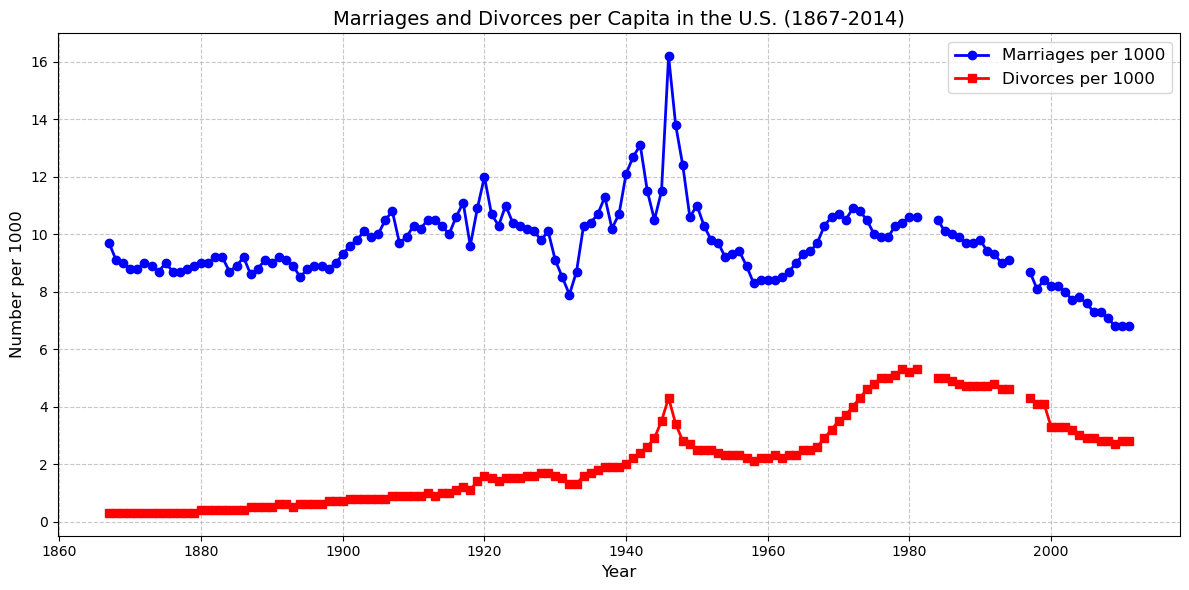

In [18]:
# Step 1: Import the required libraries for data manipulation and visualization.
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\thisi\Downloads\ps3\ps3\us-marriages-divorces-1867-2014.csv'  # Replace with the correct file location

data = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o', color='b', linestyle='-', linewidth=2)

plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='s', color='r', linestyle='-', linewidth=2)

plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)', fontsize=14)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number per 1000', fontsize=12)

plt.legend(fontsize=12)

plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!es!

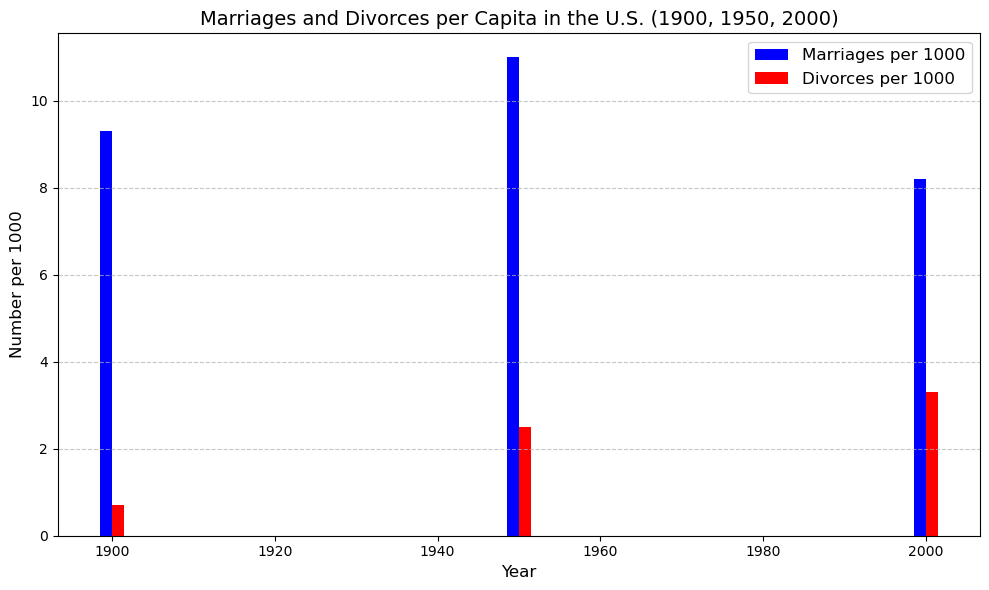

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\thisi\Downloads\ps3\ps3\us-marriages-divorces-1867-2014.csv'

stats_data = pd.read_csv(file_path)

selected_years = [1900, 1950, 2000]
yearly_data = stats_data[stats_data['Year'].isin(selected_years)]

plt.figure(figsize=(10, 6))

plt.bar(yearly_data['Year'] - 0.75, yearly_data['Marriages_per_1000'], width=1.5, label='Marriages per 1000', color='b')
plt.bar(yearly_data['Year'] + 0.75, yearly_data['Divorces_per_1000'], width=1.5, label='Divorces per 1000', color='r')

plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number per 1000', fontsize=12)

plt.legend(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

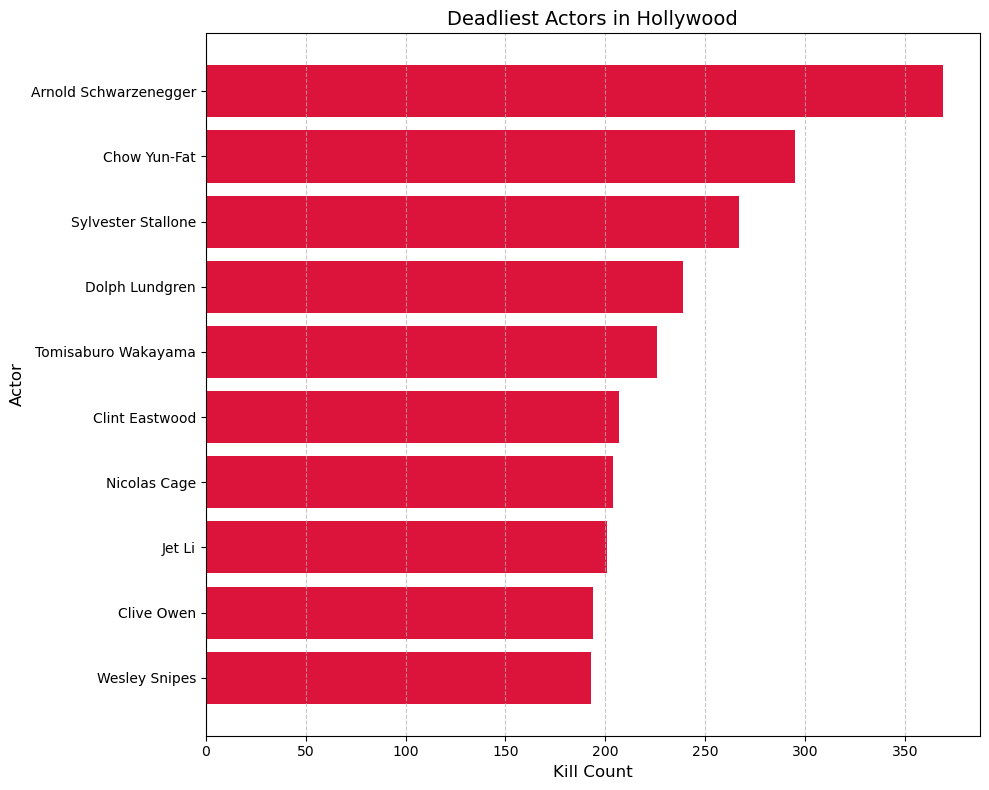

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_actors = r'C:\Users\thisi\Downloads\ps3\ps3\actor_kill_counts.csv' # Path to the dataset file

actor_kills = pd.read_csv(file_path_actors)

actor_kills_sorted = actor_kills.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 8))  # Set the figure size for better readability

plt.barh(actor_kills_sorted['Actor'], actor_kills_sorted['Count'], color='crimson')

plt.title('Deadliest Actors in Hollywood', fontsize=14)

plt.xlabel('Kill Count', fontsize=12)

plt.ylabel('Actor', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.ies.

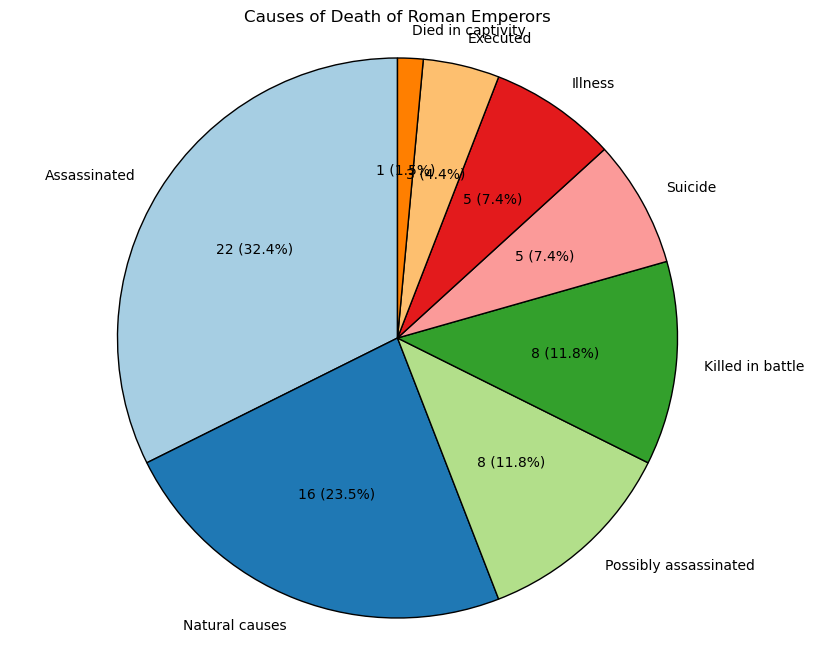

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\thisi\Downloads\ps3\ps3\roman-emperor-reigns.csv'
df = pd.read_csv(file_path)

cause_of_death_counts = df['Cause_of_Death'].value_counts()

labels = cause_of_death_counts.index
sizes = cause_of_death_counts.values
colors = plt.cm.Paired(range(len(labels)))  # Use a colormap for colors

def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f"{absolute} ({pct:.1f}%)"

plt.figure(figsize=(10, 8)) 
plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Causes of Death of Roman Emperors')

plt.axis('equal')  
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.year.

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  


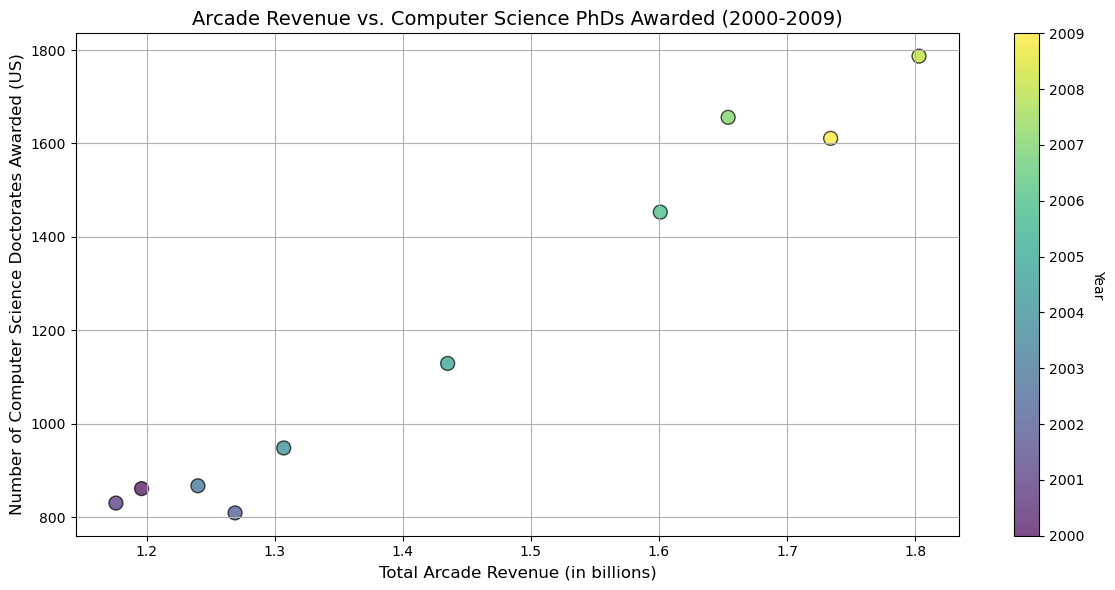

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = r'C:\Users\thisi\Downloads\ps3\ps3\arcade-revenue-vs-cs-doctorates.csv'
arcade_data = pd.read_csv(file_path)

print(arcade_data.head())

years = arcade_data['Year']
arcade_revenue = arcade_data['Total Arcade Revenue (billions)']
cs_phds_awarded = arcade_data['Computer Science Doctorates Awarded (US)']

plt.figure(figsize=(12, 6))  # Set the figure size for better visibility

scatter = plt.scatter(arcade_revenue, cs_phds_awarded, 
                      c=years, cmap='viridis', s=100, edgecolor='black', alpha=0.7)

cbar = plt.colorbar(scatter)
cbar.set_label('Year', rotation=270, labelpad=15)

plt.xlabel('Total Arcade Revenue (in billions)', fontsize=12)
plt.ylabel('Number of Computer Science Doctorates Awarded (US)', fontsize=12)

plt.title('Arcade Revenue vs. Computer Science PhDs Awarded (2000-2009)', fontsize=14)

plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()
